#### Improving results:

    The three strategies to improve the performance of ML algorithm is:

        1. Algorithm Tuning
        2. Ensembles
        3. Extreme Feature Engineering

### 1. Algorithm Tuning
    Machine learning algorithms are parameterized and modification of those parameters can influence the outcome of the learning process. Think of each algorithm parameter as a dimension on a graph with the values of a given parameter as a point along the axis. Three parameters would be a cube of possible configurations for the algorithm, and n-parameters would be an n-dimensional hypercube of possible configurations for the algorithm.The objective of algorithm tuning is to find the best point or points in that hypercube for your problem.
    
    We can approach this search problem by using automated methods that impose a grid on the possibility space and sample where good algorithm configuration might be. We can then use those points in an optimization algorithm to zoom in on the best performance.

    We can repeat this process with a number of well performing methods and explore the best you can achieve with each. It is strongly advisable that the process is automated and reasonably coarse grained as we can quickly reach points of "diminishing returns" (fractional percentage performance increases) that may not translate to the production system.

    Note: The more tuned the parameters of an algorithm, the more biased the algorithm will be to the training data and test harness. This strategy can be effective, but it can also lead to more fragile models that overfit your test harness and don’t perform as well in practice.
    
    When tuning algorithms, we must have a high confidence in the results given by your test harness. This means that we should be using techniques that reduce the variance of the performance measure you are using to assess algorithm runs. One suggestion is to perform "repeated cross validation" with a reasonably high number of folds (the exact number of which depends on your dataset).

### 2. Ensembles
    Ensemble methods are concerned with combining the results of multiple methods in order to get improved results. Ensemble methods work well when you have multiple “good enough” models that specialize in different parts of the problem.
    Three ensemble strategies that we can explore are:
        > Basic Ensemble Techniques
            - Max Voting
            - Averaging
            - Weighted Average
        > Advanced Ensemble Techniques
            - Stacking
            - Blending
            - Bagging (Bootstrapping with replacement and voting)
            - Boosting
           > Algorithms based on Bagging and Boosting
            - Bagging meta-estimator
            - Random Forest
            - AdaBoost
            - GBM
            - XGB
            - Light GBM
            - CatBoost

#### Max Voting: 
    The max voting method is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point. The predictions by each model are considered as a ‘vote’. The predictions which we get from the majority of the models are used as the final prediction.

In [10]:
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import time

X, y = load_iris(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, shuffle=True)
clf_1 = LogisticRegression()
clf_2 = SVC(random_state=0)
start_time = time.time()
clf = VotingClassifier(estimators=[('lr', clf_1),('svc', clf_2)], n_jobs=-1, voting='hard')
clf.fit(x_train, y_train)
print(f"End time: {time.time()-start_time}")
print("Test Accuracy: {}".format(clf.score(x_test, y_test)))

End time: 1.0619604587554932
Test Accuracy: 0.98


#### Averaging
    Similar to the max voting technique, multiple predictions are made for each data point in averaging. In this method, we take an average of predictions from all the models and use it to make the final prediction. Averaging can be used for making predictions in regression problems or while calculating probabilities for classification problems.

In [23]:
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time
import numpy as np

X, y = load_iris(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, shuffle=True)
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)

pred1 = model1.predict_proba(x_test)
#predict_proba gives probability of each target class for all the instances
pred2 = model2.predict_proba(x_test)
pred3 = model3.predict_proba(x_test)

finalpreds = (pred1+pred2+pred3)/3
#print(finalpreds) #this contains average probability of all the models for each class of all instances
final_test_preds = np.argmax(finalpreds, axis=1)
print(final_test_preds)
print(f"Accuracy score {accuracy_score(y_test, final_test_preds)}")

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2]
Accuracy score 0.96


#### Weighted average:
    This is an extension of the averaging method. All models are assigned different weights defining the importance of each model for prediction. For instance, if two of your colleagues are critics, while others have no prior experience in this field, then the answers by these two friends are given more importance as compared to the other people.

In [24]:
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time
import numpy as np

X, y = load_iris(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, shuffle=True)
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)

pred1 = model1.predict_proba(x_test)
#predict_proba gives probability of each target class for all the instances
pred2 = model2.predict_proba(x_test)
pred3 = model3.predict_proba(x_test)

finalpreds = (pred1*0.3+pred2*0.3+pred3*0.4)
#print(finalpreds) #this contains average probability of all the models for each class of all instances
final_test_preds = np.argmax(finalpreds, axis=1)
print(final_test_preds)
print(f"Accuracy score {accuracy_score(y_test, final_test_preds)}")

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2]
Accuracy score 0.96


#### Stacking:
    Stacking or stacked generalisation is a powerful and competitions winning ensembling technique.The architecture of a stacking model involves two or more base models, often referred to as level-0 models, and a meta-model that combines the predictions of the base models, referred to as a level-1 model. Stacking makes prediction by using a meta-model trained from a pool of base models.In simple terms, it uses predictions from multiple models (for example decision tree, knn or svm) to build a new model. This model is used for making predictions on the test set.
    Working:
        > To train a base model,Stacking uses K-fold cross validation technique.
        > We have Train Data and Test Data. Assume we are using 4-fold cross validation to train base models, the train_data is then divided into 4 parts.
        > Each base model like decision tree or svm is trained on 3 folds and predicted on fourth fold.Likewise all the folds(isntances) undergo this process and we get predictions for all the instances using the base class.
        > The predictions of training data of first base class (lets say p1) is used as one feature for meta model
        > Now the same process is done using another base model(like svm) for all the folds and the predictions(say p2) obtaines are used as another feature for meta model.
        > Once the base model predictions are obtained for training data, the base model is again trained on the whole training set without cv.This trained base model is now tested on test set and we will get the predictions of test set.
        > These test predictions ( say t1) is stored. Like wise another base model is also used to get test predictions (say t2)
        > Once all the trainings and predictions of base models are done on training and test set, The meta model(say knn) is used to train the training set.
        > But now the features will be the predictions done by base models on all training instances (p1, p2, .. ,pn)
        > The metal model will be trained and model is built
        > This model will be now used on test set. The test input will be the predictions of base model on test set(t1, t2, .., tn)
        > The test predictions made by meta model on test set are the final predictions
        

In [134]:
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time
import numpy as np
import pandas as pd

X, Y = load_iris(as_frame=True, return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0, shuffle=True)

def stacking(model, train, y_tr, test, nfolds=10):
#     y_tr = y_tr.to_numpy().reshape(-1)
    folds = StratifiedKFold(n_splits=nfolds, random_state=0, shuffle=True)
    train_preds = np.empty((0, 1), float)
#     test_preds = np.empty((test.shape[0], 1), float)
    clf = model
    for train_indices, val_indices in folds.split(train, y_tr.values):
        x_training, x_val =  train.iloc[train_indices], train.iloc[val_indices]
        y_training, y_val = y_tr.iloc[train_indices], y_tr.iloc[val_indices]
        clf.fit(x_training, y_training)
        train_preds = np.append(train_preds, clf.predict(x_val))
    #retraining whole training set
    clf.fit(train, y_tr)
    #predicting test set using whole model and to generate test features
    test_preds = clf.predict(test)
    return test_preds.reshape(-1,1), train_preds
    
#Base models training and creating new features
test_preds_1, train_preds_1 = stacking(DecisionTreeClassifier(), x_train, y_train, x_test)
test_preds_2, train_preds_2 = stacking(SVC(), x_train, y_train, x_test)

# convert into dataframe
train_pred_1 = pd.DataFrame(train_preds_1, columns=['m1'])
test_pred_1 = pd.DataFrame(test_preds_1, columns=['m1'])
train_pred_2 = pd.DataFrame(train_preds_2, columns=['m2'])
test_pred_2 = pd.DataFrame(test_preds_2, columns=['m2'])


meta_model = LogisticRegression()
meta_train_features = pd.concat([train_pred_1, train_pred_2], axis=1)
meta_test_features = pd.concat([test_pred_1, test_pred_2], axis=1)
meta_model.fit(meta_train_features, y_train)
meta_model.score(meta_test_features, y_test)

#Observation:
#There must be something wrong in the implementation.The fitting of meta model with features and its y_train must not be matching

0.02

>lr 0.964 (0.041)
>knn 0.964 (0.037)
>cart 0.947 (0.050)
>svm 0.964 (0.045)
>bayes 0.956 (0.047)
>stacking 0.962 (0.041)


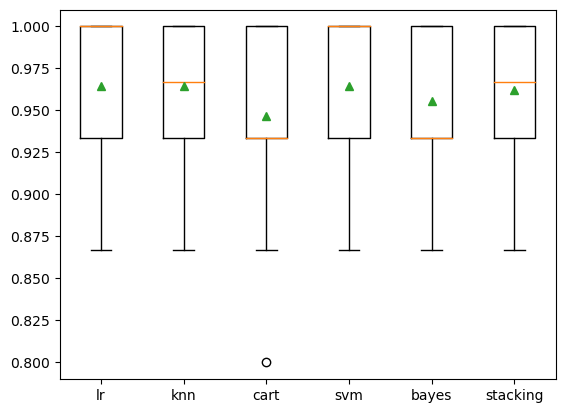

In [158]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
    #  X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    X, y = load_iris(return_X_y=True)
    return X, y

# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#### Blending:
    Blending follows the same approach as stacking but uses only a holdout (validation) set from the train set to make predictions. In other words, unlike stacking, the predictions are made on the holdout set only. The holdout set and the predictions on it are used as meta features to build a model which is run on the test set.
    1. The train set is split into training and validation sets
    2. Base models are fitted on training data, and predictions are made on holdout validation set and test_data.These predictions are used as meta features for both training set and test set i.e validation set base predictions as training meta features and test set predictions as test set meta features.
    3. Now the meta model is trained on validation set original features and also the meta features.
    4. The trained meta model is used for prediction on the test set(having its original features and the test meta features)

In [154]:
# blending ensemble for classification using hard voting
from numpy import hstack
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
    return X, y

# get a list of base models
def get_models():
    models = list()
    models.append(('lr', LogisticRegression()))
    models.append(('knn', KNeighborsClassifier()))
    models.append(('cart', DecisionTreeClassifier()))
    models.append(('svm', SVC()))
    models.append(('bayes', GaussianNB()))
    return models

# fit the blending ensemble
def fit_ensemble(models, X_train, X_val, y_train, y_val):
    # fit all models on the training set and predict on hold out set
    meta_X = list()
    for name, model in models:
        # fit in training set
        model.fit(X_train, y_train)
        # predict on hold out set
        yhat = model.predict(X_val)
        # reshape predictions into a matrix with one column
        yhat = yhat.reshape(len(yhat), 1)
        # store predictions as input for blending
        meta_X.append(yhat)
    #     meta_X.append(X_val) #adding the actual features is failing the blending logistic regression model to converge
    # create 2d array from predictions, each set is an input feature
    meta_X = hstack(meta_X)
    # define blending model
    blender = LogisticRegression()
    # fit on predictions from base models
    blender.fit(meta_X, y_val)
    return blender

 # make a prediction with the blending ensemble
def predict_ensemble(models, blender, X_test):
    # make predictions with base models
    meta_X = list()
    for name, model in models:
        # predict with base model
        yhat = model.predict(X_test)
        # reshape predictions into a matrix with one column
        yhat = yhat.reshape(len(yhat), 1)
        # store prediction
        meta_X.append(yhat)
#     meta_X.append(X_test)
    # create 2d array from predictions, each set is an input feature
    meta_X = hstack(meta_X)
    # predict
    return blender.predict(meta_X)

# define dataset
X, y = get_dataset()
# split dataset into train and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
# split training set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.33, random_state=1)
# summarize data split
print('Train: %s, Val: %s, Test: %s' % (X_train.shape, X_val.shape, X_test.shape))
# create the base models
models = get_models()
# train the blending ensemble
blender = fit_ensemble(models, X_train, X_val, y_train, y_val)
# make predictions on test set
yhat = predict_ensemble(models, blender, X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Blending Accuracy: %.3f' % (score*100))

Train: (3350, 20), Val: (1650, 20), Test: (5000, 20)
Blending Accuracy: 97.800


In [156]:
from numpy import hstack
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
    return X, y

# get a list of base models
def get_models():
    models = list()
    models.append(('lr', LogisticRegression()))
    models.append(('knn', KNeighborsClassifier()))
    models.append(('cart', DecisionTreeClassifier()))
    models.append(('svm', SVC(probability=True)))
    models.append(('bayes', GaussianNB()))
    return models

# fit the blending ensemble
def fit_ensemble(models, X_train, X_val, y_train, y_val):
    # fit all models on the training set and predict on hold out set
    meta_X = list()
    for name, model in models:
        # fit in training set
        model.fit(X_train, y_train)
        # predict on hold out set
        yhat = model.predict_proba(X_val)
        # store predictions as input for blending
        meta_X.append(yhat)
    # create 2d array from predictions, each set is an input feature
    meta_X = hstack(meta_X)
    # define blending model
    blender = LogisticRegression()
    # fit on predictions from base models
    blender.fit(meta_X, y_val)
    return blender

# make a prediction with the blending ensemble
def predict_ensemble(models, blender, X_test):
    # make predictions with base models
    meta_X = list()
    for name, model in models:
        # predict with base model
        yhat = model.predict_proba(X_test)
        # store prediction
        meta_X.append(yhat)
    # create 2d array from predictions, each set is an input feature
    meta_X = hstack(meta_X)
    # predict
    return blender.predict(meta_X)

# define dataset
X, y = get_dataset()
# split dataset into train and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
# split training set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.33, random_state=1)
# summarize data split
print('Train: %s, Val: %s, Test: %s' % (X_train.shape, X_val.shape, X_test.shape))
# create the base models
models = get_models()
# train the blending ensemble
blender = fit_ensemble(models, X_train, X_val, y_train, y_val)
# make predictions on test set
yhat = predict_ensemble(models, blender, X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Blending Accuracy: %.3f' % (score*100))

Train: (3350, 20), Val: (1650, 20), Test: (5000, 20)
Blending Accuracy: 98.260


#### Observation:
    In this case, we can see that blending the class probabilities resulted in a lift in classification accuracy to about 98.240 percent.A blending ensemble is only effective if it is able to out-perform any single contributing model.We can confirm this by evaluating each of the base models in isolation. Each base model can be fit on the entire training dataset (unlike the blending ensemble) and evaluated on the test dataset (just like the blending ensemble).

#### Bagging:
    The idea behind bagging is combining the results of multiple models (for instance, all decision trees) to get a generalized result. Here’s a question: If you create all the models on the same set of data and combine it, will it be useful? There is a high chance that these models will give the same result since they are getting the same input. So how can we solve this problem? One of the techniques is bootstrapping.

    Bootstrapping is a sampling technique in which we create subsets of observations from the original dataset, with replacement. The size of the subsets is the same as the size of the original set.

    Bagging (or Bootstrap Aggregating) technique uses these subsets (bags) to get a fair idea of the distribution (complete set). The size of subsets created for bagging may be less than the original set.
    
    1. Multiple subsets are created from the original dataset, selecting observations with replacement.
    2. A base model (weak model) is created on each of these subsets.
    3. The models run in parallel and are independent of each other.
    4. The final predictions are determined by combining the predictions from all the models.
    

#### Boosting
    Before we go further, here’s another question for you: If a data point is incorrectly predicted by the first model, and then the next (probably all models), will combining the predictions provide better results? Such situations are taken care of by boosting.

    Boosting is a sequential process, where each subsequent model attempts to correct the errors of the previous model. The succeeding models are dependent on the previous model. Let’s understand the way boosting works in the below steps.

    1. A subset is created from the original dataset.
    2. Initially, all data points are given equal weights.
    3. A base model is created on this subset.
    4. This model is used to make predictions on the whole dataset.
    5. Errors are calculated using the actual values and predicted values.
    6. The observations which are incorrectly predicted, are given higher weights.Weights can be determined using the error value. For instance, higher the error more is the weight assigned to the observation.
    7. Another model is created and predictions are made on the dataset.
        (This model tries to correct the errors from the previous model)
    8. Similarly, multiple models are created, each correcting the errors of the previous model.
    9. This process is repeated until the error function does not change, or the maximum limit of the number of estimators is reached.
    10. The final model (strong learner) is the weighted mean of all the models (weak learners)
    
    Thus, the boosting algorithm combines a number of weak learners to form a strong learner. The individual models would not perform well on the entire dataset, but they work well for some part of the dataset. Thus, each model actually boosts the performance of the ensemble.

### 3. Extreme Feature Engineering

    The previous two strategies have looked at getting more from machine learning algorithms. This strategy is about exposing more structure in the problem for the algorithms to learn. In data preparation learned about feature decomposition and aggregation in order to better normalize the data for machine learning algorithms. In this strategy, we push that idea to the limits.

    Think of your data as having complex multi-dimensional structures embedded in it that machine learning algorithms know how to find and exploit to make decisions. You want to best expose those structures to algorithms so that the algorithms can do their best work. A difficulty is that some of those structures may be too dense or too complex for the algorithms to find without help. You may also have some knowledge of such structures from your domain expertise.
    
    Take attributes and decompose them widely into multiple features. Technically, what you are doing with this strategy is reducing dependencies and non-linear relationships into simpler independent linear relationships.
    
    Examples:
        
        Categorical: You have a categorical attribute that had the values [red, green blue], you could split that into 3 binary attributes of red, green and blue and give each instance a 1 or 0 value for each.
        
        Real: You have a real valued quantity that has values ranging from 0 to 1000. You could create 10 binary attributes, each representing a bin of values (0-99 for bin 1, 100-199 for bin 2, etc.) and assign each instance a binary value (1/0) for the bins.

    Note: It is recommended to perform this process one step at a time and creating a new test/train dataset for each modification you make and then test algorithms on the dataset. This will start to give you an intuition for attributes and features in the database that are exposing more or less information to the algorithms and the effects on the performance measure. You can use these results to guide further extreme decompositions or aggregations.

### Cheatsheet to improve results

    Choose one technique and one method from it and apply and check the results and improvise and add another and so on
    1.Improve Performance With Data.
    2.Improve Performance With Algorithms.
    3.Improve Performance With Algorithm Tuning.
    4.Improve Performance With Ensembles.

#### 1.Improve Performance With Data.
    > Data Tactics
        Get More Data. Can you get more or better quality data? Modern nonlinear machine learning techniques like deep learning continue to improve in performance with more data.
    
    > Invent More Data.
        If you can’t get more data, can you generate new data? Perhaps you can augment or permute existing data or use a probabilistic model to generate new data.

    > Clean Your Data.
        Can you improve the signal in your data? Perhaps there are missing or corrupt observations that can be fixed or removed, or outlier values outside of reasonable ranges that can be fixed or removed in order to lift the quality of your data.

    > Resample Data.
        Can you resample data to change the size or distribution? Perhaps you can use a much smaller sample of data for your experiments to speed things up or over-sample or under-sample observations of a specific type to better represent them in your dataset.

    > Reframe Your Problem: 
    Can you change the type of prediction problem you are solving? Reframe your data as a regression, binary or multiclass classification, time series, anomaly detection, rating, recommender, etc. type problem.

    > Rescale Your Data.
        Can you rescale numeric input variables? Normalization and standardization of input data can result in a lift in performance on algorithms that use weighted inputs or distance measures.

    > Transform Your Data.
        Can you reshape your data distribution? Making input data more Gaussian or passing it through an exponential function may better expose features in the data to a learning algorithm.

    > Project Your Data
        Can you project your data into a lower dimensional space? You can use an unsupervised clustering or projection method to create an entirely new compressed representation of your dataset.

    > Feature Selection
        Are all input variables equally important? Use feature selection and feature importance methods to create new views of your data to explore with modeling algorithms.

    > Feature Engineering
        Can you create and add new data features? Perhaps there are attributes that can be decomposed into multiple new values (like categories, dates or strings) or attributes that can be aggregated to signify an event (like a count, binary flag or statistical summary).

#### 2.Improve Performance With Algorithms.

    > Resampling Method. 
        What resampling method is used to estimate skill on new data? Use a method and configuration that makes the best use of available data. The k-fold cross-validation method with a hold out validation dataset might be a best practice.

    > Evaluation Metric.
        What metric is used to evaluate the skill of predictions? Use a metric that best captures the requirements of the problem and the domain. It probably isn’t classification accuracy.

    > Baseline Performance.
        What is the baseline performance for comparing algorithms? Use a random algorithm or a zero rule algorithm (predict mean or mode) to establish a baseline by which to rank all evaluated algorithms.

    > Spot Check Linear Algorithms.
        What linear algorithms work well? Linear methods are often more biased, are easy to understand and are fast to train. They are preferred if you can achieve good results. Evaluate a diverse suite of linear methods.

    > Spot Check Nonlinear Algorithms.
        What nonlinear algorithms work well? Nonlinear algorithms often require more data, have greater complexity but can achieve better performance. Evaluate a diverse suite of nonlinear methods.

    > Steal from Literature.
        What algorithms are reported in the literature to work well on your problem? Perhaps you can get ideas of algorithm types or extensions of classical methods to explore on your problem.

    > Standard Configurations.
        What are the standard configurations for the algorithms being evaluated? Each algorithm needs an opportunity to do well on your problem. This does not mean tune the parameters (yet) but it does mean to investigate how to configure each algorithm well and give it a fighting chance in the algorithm bake-off.

#### 3.Improve Performance With Algorithm Tuning.
    
    > Diagnostics.
        What diagnostics and you review about your algorithm? Perhaps you can review learning curves to understand whether the method is over or underfitting the problem, and then correct. Different algorithms may offer different visualizations and diagnostics. Review what the algorithm is predicting right and wrong.

    > Try Intuition.
        What does your gut tell you? If you fiddle with parameters for long enough and the feedback cycle is short, you can develop an intuition for how to configure an algorithm on a problem. Try this out and see if you can come up with new parameter configurations to try on your larger test harness.

    > Steal from Literature.
        What parameters or parameter ranges are used in the literature? Evaluating the performance of standard parameters is a great place to start any tuning activity.

    > Random Search.
        What parameters can use random search? Perhaps you can use random search of algorithm hyperparameters to expose configurations that you would never think to try.

    > Grid Search.
        What parameters can use grid search? Perhaps there are grids of standard hyperparameter values that you can enumerate to find good configurations, then repeat the process with finer and finer grids.

    > Optimize. 
        What parameters can you optimize? Perhaps there are parameters like structure or learning rate than can be tuned using a direct search procedure (like pattern search) or stochastic optimization (like a genetic algorithm).

    > Alternate Implementations.
        What other implementations of the algorithm are available? Perhaps an alternate implementation of the method can achieve better results on the same data. Each algorithm has a myriad of micro-decisions that must be made by the algorithm implementor. Some of these decisions may affect skill on your problem.

    > Algorithm Extensions.
        What are common extensions to the algorithm? Perhaps you can lift performance by evaluating common or standard extensions to the method. This may require implementation work.

    > Algorithm Customizations.
        What customizations can be made to the algorithm for your specific case? Perhaps there are modifications that you can make to the algorithm for your data, from loss function, internal optimization methods to algorithm specific decisions.

    > Contact Experts.
        What do algorithm experts recommend in your case? Write a short email summarizing your prediction problem and what you have tried to one or more expert academics on the algorithm. This may reveal leading edge work or academic work previously unknown to you with new or fresh ideas.

#### 4.Improve Performance With Ensembles.
    
    > Blend Model Predictions.
        Can you combine the predictions from multiple models directly? Perhaps you could use the same or different algorithms to make multiple models. Take the mean or mode from the predictions of multiple well-performing models.

    > Blend Data Representations.
        Can you combine predictions from models trained on different data representations? You may have many different projections of your problem which can be used to train well-performing algorithms, whose predictions can then be combined.

    > Blend Data Samples.
        Can you combine models trained on different views of your data? Perhaps you can create multiple subsamples of your training data and train a well-performing algorithm, then combine predictions. This is called bootstrap aggregation or bagging and works best when the predictions from each model are skillful but in different ways (uncorrelated).

    > Correct Predictions.
        Can you correct the predictions of well-performing models? Perhaps you can explicitly correct predictions or use a method like boosting to learn how to correct prediction errors.
        
    > Learn to Combine.
        Can you use a new model to learn how to best combine the predictions from multiple well-performing models? This is called stacked generalization or stacking and often works well when the submodels are skillful but in different ways and the aggregator model is a simple linear weighting of the predictions. This process can be repeated multiple layers deep.